# Problem Set 3

<b> Hendyel Pacheco </b>

## Data:
The data file for this problem set is at: 

  **/ufrc/zoo6927/share/Class_Files/data/CO-OPS__8729108__wl.csv**

  It is also in the Class_Files git repo [here](https://github.com/CompTools/Class_Files/blob/master/data/CO-OPS__8729108__wl.csv)
  
  The metadata file for this file is [here](https://github.com/CompTools/Class_Files/blob/master/data/CO_OPS__wl_file.md)

## Problem 1:
Write a script (or Jupyter Notebook code block) that opens the file, uses a for loop to read through the file line by line and calculates the highest water level and the date and time that was observed.

In [49]:
data = open("CO-OPS__8729108__wl.csv")

count = 0
WL_max = 0.0 #define a variable that holding the maximum water level value

for level in data:
    count = count + 1
    if count > 1:
        date=level.strip().split(",")[0] #parsing the date
        water_level=level.strip().split(",")[1] #parsing the water level
        #skip empty values
        try:
           water_level = float(water_level)
        except:
            continue #continue even if it encounters a non-float value
        if water_level > WL_max:
            WL_max=float(water_level) #define a variable that holding the data of maximum water level
            D_max=date
           
print('Date and time: ', D_max,'\nHighest water level: ' ,WL_max)

Date and time:  2018-10-10 18:06 
Highest water level:  6.647


## Problem 2:
Write a script (or Jupyter Notebook code block) that reads the file into a Pandas dataframe and calculates the highest water level and the date and time that was observed.

In [1]:
import pandas as pd

df=pd.read_csv("CO-OPS__8729108__wl.csv")

data=df.dropna() #remove NA

data=pd.DataFrame(data, columns=['Date Time', ' Water Level']) #extract the data frame called "data" containing 'Data Time' and 'Water Level'
data[' Water Level'] = pd.to_numeric(data[' Water Level'], errors='coerce')

data.sort_values(by=[' Water Level'], ascending=False).head(1) #sort the data frame base on "Water Level" and show the first row

,Date Time,Water Level
421,2018-10-10 18:06,6.647


## Problem 3:
Write a script (or Jupyter Notebook code block) that calculates the fastest rise in water level per 6-minute period between measurements and reports the data and time that was observed and the change in water level during that period. You can use line by line or dataframe for this.

In [2]:
import pandas as pd

df = pd.read_csv("CO-OPS__8729108__wl.csv")

data = df.dropna() #remove NA

data = pd.DataFrame(data, columns=['Date Time', ' Water Level']) #extract the data frame called "data" containing 'Data Time' and 'Water Level'
data[' Water Level'] = pd.to_numeric(data[' Water Level'], errors='coerce')
raise_max = 0.0
for i in range(0,data.shape[0]-1): #loop through the data frame based on its dimension
    level_diff = float(data.iloc[i+1][1]) - float(data.iloc[i][1]) #calculate level difference
    if level_diff > raise_max:
        raise_max = level_diff #maximum raised level
        start = data.iloc[i][0] #starting date
        end = data.iloc[i+1][0] #ending date
print("From", start, "to", end, "Water Level increased:", round(raise_max, 2))

From 2018-10-10 17:36 to 2018-10-10 17:42 Water Level increased: 0.64


## Problem 4: 
Write a script (or Jupyter Notebook code block) that plots a line graph of water level over time using matplotlib.

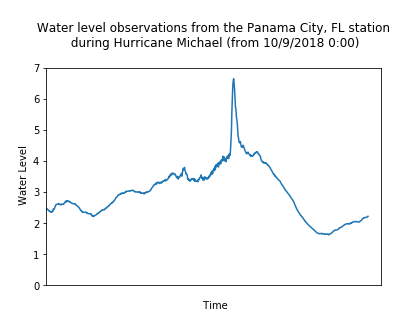

In [3]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt


Table = pd.read_csv('CO-OPS__8729108__wl.csv') #reads through csv and puts into a table 

Table = df.dropna() #remove NA


wl = Table[' Water Level']
time = Table['Date Time']

plt.plot(time, wl, '-')
plt.axis([0, 750, 0, 7])
plt.xlabel('\n Time')
plt.ylabel('\n Water Level')
plt.title('\n Water level observations from the Panama City, FL station \n during Hurricane Michael (from 10/9/2018 0:00)\n')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # removes x axis tick marks so that there is not a large black line 
    top=False,         # removes x axis ticks along the top to remove black line 
    labelbottom=False)

plt.show()

## Problem 5: Peer Review:
Each person will review one other persons answers and leave comments. 

If the code works for the reviewer and produces the desired result, they will say so.

If it doesn't work they will try to figure out why and suggest a fix.

If the reviewer can understand the code, its logic and what you are doing they will say so.

If the reviewer can't understand what you were doing, they will suggest where things are confusing and how to improve.

## Extra Credit:
Using the Web Services Button on this page LINK as a guide and/or the API description LINK, write a script (or Jupyter Notebook code block) to download data from Panama City, Fl for "today" e.i. whenever the code is run, get that day's data.

In [4]:
import urllib.request, urllib.parse, urllib.error
import datetime as dt
import requests

serviceurl = 'https://tidesandcurrents.noaa.gov/api/datagetter?'
id="8729108"
units="english"
timezone="GMT"
datum="MLLW"
product="water_level"
application="NOS.COOPS.TAC.WL"
format="csv" 

#open a output file
output=open("Water_Level_Today.csv", "w+")

url = serviceurl +\
      urllib.parse.urlencode({"station":id,
                                "time_zone":timezone,
                                "datum":datum,
                                "product":product,
                                "application": application,
                                "units":units,
                                "format": "csv",
                                "date":"today"
                               })
     
 

print('Water level data file from Panama City, Fl has been downloaded, which can also be accessed in:\n',url,'\n') #report url
response = requests.get(url)
   
if response.status_code != 200:
    print('Failed to get data:', response.status_code)
else:
    print(response.text[:100])
    output.write(response.text)

#Output file closed
output.close()

Water level data file from Panama City, Fl has been downloaded, which can also be accessed in:
 https://tidesandcurrents.noaa.gov/api/datagetter?station=8729108&time_zone=GMT&datum=MLLW&product=water_level&application=NOS.COOPS.TAC.WL&units=english&format=csv&date=today 

Date Time, Water Level, Sigma, O, F, R, L, Quality 
2018-10-26 00:00,2.182,,1,0,0,0,p
2018-10-26 00:
